In [248]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# 1. Write a function to shift an array using convolution

Convolution thm: $ f \circledast g = ift(dft(f) \times dft(g))$

In this case g is defined s.t. $FT(g) = xp(-2 \pi i k \delta x/len(array))$, where $\delta x$ is the shift. So convolving f and g will shift f to the right by $\delta x$ (in array indices).

When I shift the array by len/2, we can see that the array is now centered at array element 100 instead of 50, which wraps around because FFTs are periodic.

In [175]:
def shift_arr(arr,shift):
    F=np.fft.fft(arr)
    k=np.arange(len(arr))
    G=np.exp(-2*np.pi*1J*k*shift/len(arr))
    ft_shift=F*G
    shift=np.real(np.fft.ifft(ft_shift))
    return shift

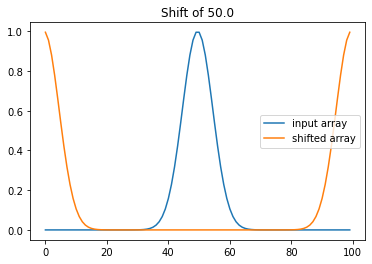

In [181]:
x = np.linspace(-10,10,100)
f = np.exp(-0.5*x**2)
plt.plot(f,label='input array')
dx = len(x)/2

plt.title(f"Shift of {dx}")
plt.plot(shift_arr(f,dx),label='shifted array')
plt.legend()

This looks nicer when we use a smaller shift, so I'll also include a shift of array length/4

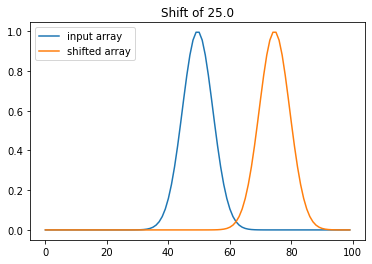

In [166]:
x = np.linspace(-10,10,100)
f = np.exp(-0.5*x**2)
plt.plot(f,label='input array')
dx = len(x)/4

plt.title(f"Shift of {dx}")
plt.plot(shift_arr(f,dx),label='shifted array')
plt.legend()

# 2. 

## a) Write a routine to take the correlation of two arrays

Correlation: $IFT(FT(f) \times (conj(FT(g))))$

In [4]:
def correlation(arr1,arr2):
    return np.fft.irfft(np.fft.rfft(arr1)*np.conjugate(np.fft.rfft(arr2)))

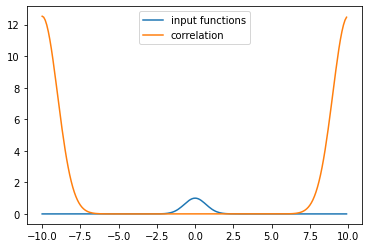

In [119]:
x = np.arange(-10,10,0.1)
f = np.exp(-x**2)
plt.plot(x,f,label='input functions')
plt.plot(x,correlation(f,f),label='correlation')
plt.legend()

## b) Write a routine to take the correlation of an arbitrarily shifted Gaussian with itself. How does the correlation function change with the shift?

As can be seen in the plot below, only the phase of the correlation function changes with shift. The amplitude and the width stay the same, as we would expect.

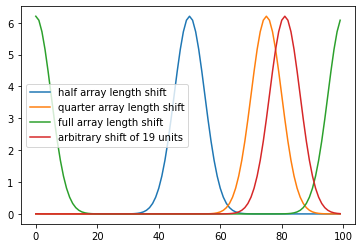

In [197]:
def corr_shift(f,shift):
    f_shift = shift_arr(f,shift)
    corr = correlation(f,f_shift)
    return corr

x = np.linspace(-10,10,100)
f = np.exp(-x**2)

shift_half = corr_shift(f,len(x)/2)
shift_quarter = corr_shift(f,len(x)/4)
shift_arbitrary = corr_shift(f,19)
shift_full = corr_shift(f,len(x))

plt.plot(shift_half,label='half array length shift')
plt.plot(shift_quarter,label='quarter array length shift')
plt.plot(shift_full,label='full array length shift')
plt.plot(shift_arbitrary,label='arbitrary shift of 19 units')
plt.legend()

I'm a little unsure of the wording of the question, so in the above work, I did correlation(shifted gaussian, original gaussian) but I'm not sure if what the PS meant is correlation(shifted gaussian, shifted gaussian), so my work for the second case is below.

As can be seen in the bottom plot, in this case, the shift has no effect on the correlation function whatsoever, not even for phase, as the function is always a gaussian centered at 100 array units

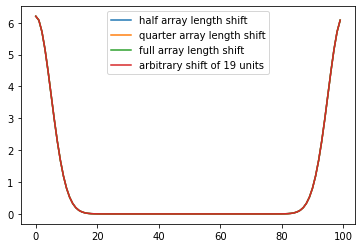

In [198]:
def corr_shift(f,shift):
    f_shift = shift_arr(f,shift)
    corr = correlation(f_shift,f_shift)
    return corr

x = np.linspace(-10,10,100)
f = np.exp(-x**2)

shift_half = corr_shift(f,len(x)/2)
shift_quarter = corr_shift(f,len(x)/4)
shift_arbitrary = corr_shift(f,19)
shift_full = corr_shift(f,len(x))

plt.plot(shift_half,label='half array length shift')
plt.plot(shift_quarter,label='quarter array length shift')
plt.plot(shift_full,label='full array length shift')
plt.plot(shift_arbitrary,label='arbitrary shift of 19 units')
plt.legend()

# 3. Write a function that does an FFT based convolution without wrapping around

Here I use np.roll to shift the arrays by len/2 in order to make sure they end up centered after being convolved.

In [200]:
def conv_no_wrap(f,g):
    zeros = np.zeros(len(f))
    f = np.hstack((f,zeros))
    g = np.hstack((zeros,g))
    F = np.fft.fft(f)
    G = np.fft.fft(g)
    return np.fft.ifft(F*G)

/Users/samanthawong/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/samanthawong/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


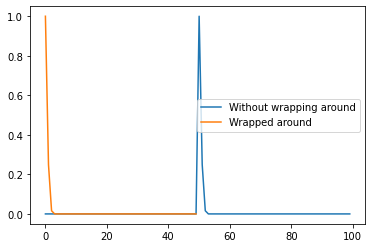

In [202]:
x = np.linspace(0,100)
f = np.exp(-0.5*x**2)
plt.plot(conv_no_wrap(f,f),label="Without wrapping around")
plt.plot(np.fft.ifft(np.fft.fft(f)*np.fft.fft(f)),label="Wrapped around")
plt.legend()

# 4. DFT Analysis

### a) Show that $\sum_{x=0}^{N-1} exp(-2 \pi ikx/N) = \frac{1-e^{2 \pi i k}}{1-e^{2 \pi i k/N}}$

Represent as a geometric series $S_n = \sum_{x=0}^{n} \alpha^x = \frac{1-\alpha^{n+1}}{1-\alpha}$, where $\alpha =  exp(-2 \pi ikx/N), n = N+1$

$\Rightarrow S_n = \frac{1-exp(-2 \pi ik/N)N}{1-exp(-2 \pi ik/N)} = \boxed{\frac{1-exp(-2 \pi ik}{1-exp(-2 \pi ik/N)}}$

$DFT = \frac{1-e^{2 \pi i k}}{1-e^{2 \pi i k/N}}$

### b) Show that this approaches N as k approaches zero

Take limit of $S_n$ as $k \rightarrow 0$

$\lim_{k\to0}\frac{1-exp(-2 \pi ik)}{1-exp(-2 \pi ik/N)}$

By L'Hôpital's rule:
$\lim_{k\to0}\frac{2 \pi iexp(-2 \pi ik)}{\frac{2 \pi i}{N}exp(-2 \pi ik/N)} \rightarrow$ as k $\rightarrow$ 0, all terms go to 1 except N

$\Rightarrow \lim_{k\to0} N = \boxed{N}$ 

### b ct'd) Show that this is zero for any integer k that is not a multiple of N

Expand the exponentials to be in terms of sin/cos (since we know $sin(2 \pi n) = 0, cos(2 \pi n) = 1$, if n is an integer):

$S_n = \frac{1-[cos(-2 \pi k) + isin(-2 \pi k)]}{1-[cos(-2 \pi k/N) + isin(-2 \pi k/N)]}$

If k is not a multiple of N, the numerator will be 0, since k is an integer, and the denominator will be nonzero, since k/N will be a noninteger. This will give us $S_n = \frac{0}{\#} = 0$

If k is a multiple of N, then both the numerator and the denominator will be zero, since we will have both sin and cos of integer multiples of $2 \pi$. This gives us $S_n = \frac{0}{0} = 1$.

### c) Plot analytic DFT esimate for non-integer k sine wave

To avoid confusion with k, our independent variable in Fourier space, we'll call the wavenumber of the sin wave $\omega$ rather than k (i.e., we plot for a non-integer $\omega$).

Sine wave (Euler's formula): $f(x) = \frac{e^{i \omega x} - e^{-i \omega x}}{2i}$

The DFT of this will be: F(k) = $\sum_{x=0}^{N-1} f(x) exp(-2 \pi ikx/N )$

$ F(k) = \sum_{x=0}^{N-1} \frac{e^{i \omega x} - e^{-i \omega x}}{2i} e^{-2 \pi ikx/N} $

Multiply out the exponentials $F(k) = \frac{1}{2i} \sum_{x=0}^{N-1} e^{i \omega x - 2 \pi ikx/N} - e^{-i \omega x - 2 \pi ikx/N}$

Treat each as a separate geometric series $\sum \alpha^x$, with $\alpha_1 = e^{i \omega - 2 \pi ik/N}$ and $\alpha_2 = e^{-i \omega - 2 \pi ik/N}$

(1) $S_n = \frac{{1-e^{i \omega N- 2 \pi ik/N}}^{N+1-1}}{1-e^{i \omega N - 2 \pi ik/N}} = \frac{1-e^{i \omega N- 2 \pi ik}}{1-e^{i \omega N- 2 \pi ik/N}}$

(2) Similarly, $S_n = \frac{1-e^{-i \omega N + 2 \pi ik}}{1-e^{-i \omega + 2 \pi ik/N}}$

$\Rightarrow F(k) = \frac{1}{2i} [\frac{1-e^{i \omega N - 2 \pi ik}}{1-e^{i \omega  - 2 \pi ik/N}} - \frac{1-e^{-i \omega N + 2 \pi ik}}{1-e^{-i \omega + 2 \pi ik/N}}]$

In [16]:
N = 1000
k = 1.5
x = np.arange(N)

k_plot = 2*np.pi/N*np.arange(N)
np_ft = np.abs(np.fft.fft(np.sin(k*x)))

#normalize
np_ft = np_ft/np.max(np_ft)

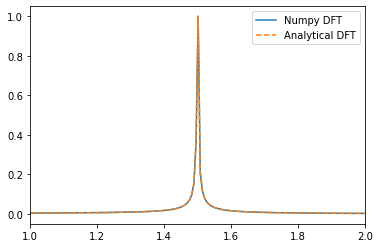

(1.0, 2.0)

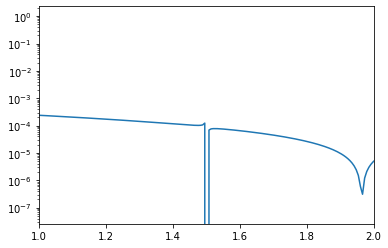

In [54]:
k = np.arange(N)
omega = 1.5

dft_ana = (1-np.exp(1J*omega*N-2*np.pi*1J*k))/(1-np.exp(1J*omega-2*np.pi*1J*k/N)) - (1-np.exp(-1J*omega*N+2*np.pi*1J*k))/(1-np.exp(-1J*omega+2*np.pi*1J*k/N))
dft_ana = dft_ana/2J

#normalize
dft_ana = np.abs(dft_ana)
dft_ana = dft_ana/np.max(dft_ana)

plt.plot(k_plot,np_ft,label='Numpy DFT')
plt.plot(k_plot,dft_ana,'--',label='Analytical DFT')
plt.xlim(1,2)
plt.legend()
plt.show()

#residuals
r = np.abs(dft_ana - np_ft)
plt.semilogy(k_plot,r)
plt.xlim(1,2)

Both of our DFTs look like delta functions, though Numpy's DFT has a second peak (I assume because of the periodic nature of DFTs) that I cropped out for comparison's sake.

The residuals have a bit of a weird shape (especially at the peak of the delta function) and don't quite agree to machine precision, though they are fairly small. 

### d) Window the data

Our window function is $0.5 − 0.5 cos(2 \pi x/N)$

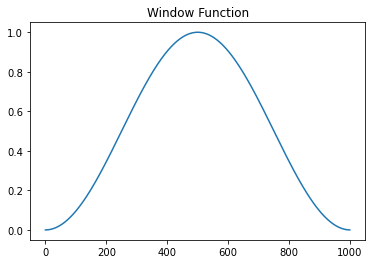

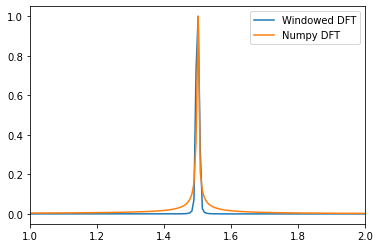

In [72]:
win = 0.5-0.5*np.cos(2*np.pi*x/N)
plt.plot(win)
plt.title('Window Function')
plt.show()
k = 1.5

fun = np.sin(k*x)

np_ft_win = np.abs(np.fft.fft(win*fun))
np_ft_win = np_ft_win/np.max(np_ft_win)

plt.plot(k_plot,np_ft_win,label='Windowed DFT')
plt.plot(k_plot,np_ft,label='Numpy DFT')
plt.xlim(1,2)
plt.legend()

### e) Show that the Fourier transform of the window is [N/2, N/4, 0 ... ,0, N/4]

I'm going to do this numerically with Numpy's `fft.fft` and look at the output array values to make sure they match what we expect

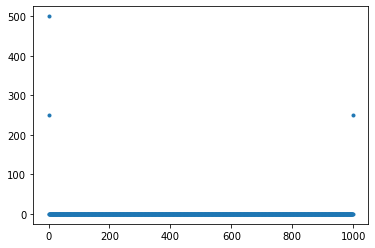

First term in FFT of window: 500.0, N/2: 500.0
Second term in FFT of window: 250.0, N/4: 250.0
Mean of all middle terms: 2.3414868645274687e-15 (this is ~ 0 for machine precision)
Last term in FFT of window: 250.0, N/4: 250.0


In [208]:
win_fft = np.abs(np.fft.fft(win))
plt.plot(win_fft,'.')
plt.show()

print(f'First term in FFT of window: {win_fft[0]}, N/2: {N/2}')
print(f'Second term in FFT of window: {win_fft[1]}, N/4: {N/4}')
print(f'Mean of all middle terms: {np.mean(win_fft[2:-1])} (this is ~ 0 for machine precision)')
print(f'Last term in FFT of window: {win_fft[-1]}, N/4: {N/4}')

#print(win_fft)

### Use this to show that you can get the windowed Fourier transform by appropriate combinations of each point in the unwindowed Fourier transform and its immediate neighbors

By convolution theorem (windowing is a convolution in real space): $IFFT(F*G) = IFFT(F) \times IFFT(G) = f \times g$

$\Rightarrow$ in real space, the analogue is $FT(f*g) = F \times G$

We know the FT of the window only has three nonzero terms, $G(N) = N/2, G(N+1) = N/4$, and $G(N-1) = N/4$ (I've shifted this, since DFTs are periodic), which we can apply to the whole array, F (in this case, this is the numpy FFT from above):

$FT(f*g) = F(G(k)) = F[n]/2 - F[n-1]/4 - F[n+1]/4$

So that we get the equivalent of a window function from just the neighbours of our array values.

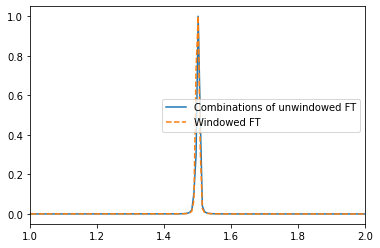

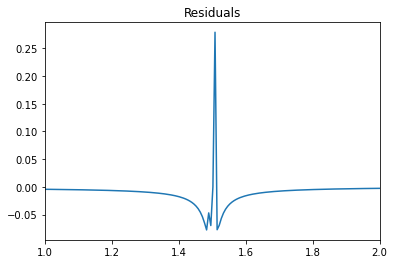

In [245]:
new_win = np.zeros(N)
N = len(np_ft)

#boundaries - we can loop around since DFTs are periodic (i.e., neighbours of first element are second and last elements)
new_win[0] = np_ft[0]/2 - np_ft[1]/4 - np_ft[-1]/4
new_win[-1] = np_ft[-1]/2 - np_ft[0]/4 - np_ft[-2]/4

for i in range(1,N-1):
    new_win[i] = np_ft[i]/2 - np_ft[i+1]/4 - np_ft[i-1]/4
    
new_win = np.abs(new_win)
new_win = new_win/np.max(new_win)
plt.plot(k_plot,new_win,label='Combinations of unwindowed FT')
plt.plot(k_plot,np_ft_win,'--',label='Windowed FT')
plt.legend()
plt.xlim(1,2)
plt.show()

plt.plot(k_plot,new_win - np_ft)
plt.xlim(1,2)
plt.title('Residuals')
plt.show()

# 5. Matched Filter of LIGO Data

Data files are from https://github.com/losc-tutorial/LOSC_Event_tutorial

In [84]:
import h5py
import glob
import json

Some functions from Jon's code that help read LIGO data/templates:

In [85]:
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx

def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

# a) Estimate the noise in the each detector separately

### We'll start by using a window function and then taking the FT to avoid FFT ringing

We want a window that is wide in the centre, so we don't accidentally get rid of the signal by windowing. To do this, we'll use the Turkey window (https://en.wikipedia.org/wiki/Window_function#:~:text=window%20(or%20function).-,Tukey%20window,-%5Bedit%5D), which is a cosine lobe convolved with a rectangle window.

For a rectangle of width $N(1 − \alpha/2)$, this mathematically looks like:

$ w[n] = \frac{1}{2}[1-cos(\frac{2\pi n}{\alpha N})] ,\ 0 \leq n \leq \frac{\alpha N}{2}$

$ w[n] = 1,\ \frac{\alpha N}{2} \leq n \leq \frac{N}{2}$

$ w[N-n] = w[n],\ 0 \leq n \leq \frac{N}{2}$

This is all emcompassed in the `window` function

### Then we want to convolve with a Gaussian kernel to smooth out the noise
This is done with Jon's `smooth_vector` function from `ligo_class.py` - it takes input as the correlated noise and then smooths it by convolving a Gaussian kernel with the data.

I use a smallish width for the Gaussian kernel, so the important noise lines are kept (not smoothed out) but there aren't huge fluxuations between neighbouring noise values, so these are sufficiently smoothed.

### `get_noise_model` Function

My `get_noise_model` takes in strain data and windows the data with a Turkey window, before taking the power spectrum and smoothing it using `smooth_vector` with a Gaussian kernel width of 5. This returns the matrix $N^{-1}$ and can be resized if necessary (this makes sure all vectors stay the same size, depending on the operations we're doing).

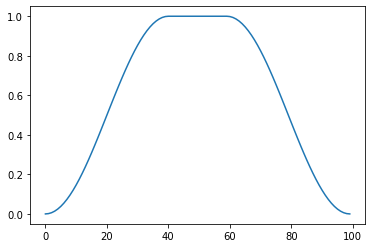

In [86]:
def window(alpha, N):
    arr = np.zeros(N)
    for n in range(len(arr)):
        if (n >= 0) and (n < (alpha*N)/2):
            arr[n] = 0.5*(1-np.cos((2*np.pi*n)/(alpha*N)))
        if ((n >= (alpha*N)/2)) and (n <= N/2):
            arr[n] = 1
        if (n >= 0) and (n <= N/2):
            arr[N-n-1] = arr[n]
    return arr

def smooth_vector(vec,sig):
    n=len(vec)
    x=np.arange(n)
    x[n//2:]=x[n//2:]-n
    kernel=np.exp(-0.5*x**2/sig**2) #make a Gaussian kernel
    kernel=kernel/kernel.sum()
    vecft=np.fft.rfft(vec)
    kernelft=np.fft.rfft(kernel)
    vec_smooth=np.fft.irfft(vecft*kernelft) #convolve the data with the kernel
    return vec_smooth
plt.plot(window(0.8,100))

In [87]:
def get_noise_model(strain,resize=True):
    win = window(0.8,len(strain)) #window with a Turkey window with alpha = 0.8
    ft_windowed = np.fft.fft(strain*win) #window our strain data
    ps = np.abs(ft_windowed)**2 #take the ps of windowed data
    smooth = smooth_vector(ps,5) #smooth with a gaussian of width 5
    if resize:
        smooth = smooth[:len(ft_windowed)//2+1]
    Ninv = 1/smooth
    return Ninv

### Get the noise models for the two detectors

I'll look at the raw data vs. windowed & smoothed noise for GW150914 in the two detectors separately. Here I introduce a new function `smooth_ps`, which is the same as `get_noise_model` but returns the smoothed power spectrum instead of 1/smoothed PS - I didn't want to have multiple returns for `get_noise_model` for sanity reasons later :) 

We see in the plots below that windowing and smoothing the noise gets rid of the large fringes on the RHS of the plot as well as changes the shape of the noise so it looks more like we'd expect to see (like in the LOSC notebook example).

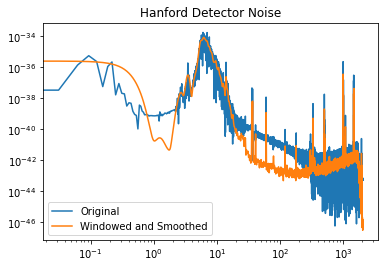

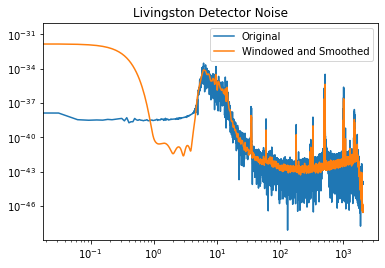

In [88]:
def smooth_ps(strain):
    win = window(0.6,len(strain)) #window with a Turkey window with alpha = 0.8
    ft_windowed = np.fft.fft(strain*win) #window our strain data
    ps = np.abs(ft_windowed)**2 #take the ps of windowed data
    smooth = smooth_vector(ps,5) #smooth with a gaussian of width 10
    smooth = smooth[:len(ft_windowed)//2+1]
    return smooth

strain_h,dt_h,utc_h = read_file('H-H1_LOSC_4_V2-1126259446-32.hdf5')
strain_l,dt_l,utc_l = read_file('L-L1_LOSC_4_V2-1126259446-32.hdf5')

t_tot = dt_h*len(strain_h)
d_nu = 1/t_tot

noise_h = smooth_ps(strain_h)
noise_l = smooth_ps(strain_l)

#normalize
noise_h = noise_h/len(noise_h)
noise_l = noise_l/len(noise_l)

nu_vec = np.arange(len(noise_h))*d_nu

#look at noise without windows
noise_h_now = np.abs(np.fft.rfft(strain_h))[:len(nu_vec)]**2 / len(strain_h) 
noise_l_now = np.abs(np.fft.rfft(strain_l))[:len(nu_vec)]**2 / len(strain_h)

plt.loglog(nu_vec,noise_h_now,label='Original')
plt.loglog(nu_vec,noise_h,label='Windowed and Smoothed')
plt.title('Hanford Detector Noise')
plt.legend()
plt.show()

plt.loglog(nu_vec,noise_l_now,label='Original')

plt.loglog(nu_vec,noise_l,label='Windowed and Smoothed')
plt.title('Livingston Detector Noise')
plt.legend()
plt.show()

# b) Use that noise model to search the four sets of events using a matched filter

### First we'll go through the BBH_events_v3.json file to load in the events and templates into arrays

In [90]:
eventnames = np.asarray(['GW150914','GW151226','GW170104'])
fnjson = "BBH_events_v3.json"
fn_H1 = np.array(())
fn_L1 = np.array(())
fn_template = np.array(())

for eventname in eventnames:
    events = json.load(open(fnjson,"r"))
    event = events[eventname]
    fn_H1 = np.append(fn_H1,event['fn_H1'])              # File name for H1 data
    fn_L1 = np.append(fn_L1,event['fn_L1'])              # File name for L1 data
    fn_template = np.append(fn_template,event['fn_template'])

### Now we'll search this data using matched filters

The `mf_data` function does this by loading in each data and template file, then windowing the template, filtering the template with the noise model, windowing data, then MF the data by $MF = IFT(FT(data)*conj(FT(template)))$

This returns both the MF dataa [0] and the noise model [1], which we'll use later.

In [91]:
def mf_data(data_file,temp_file):
    #load in data
    temp,tx = read_template(temp_file)
    strain,dt,utc = read_file(data_file)
    
    #window template
    template_ft=np.fft.rfft(temp*window(0.8,len(temp)))
    
    #filter template with appropriate noise model
    template_filt=template_ft*get_noise_model(strain)
    
    #window data
    data_ft=np.fft.rfft(strain*window(0.8,len(strain)))
    
    #MF data
    rhs=np.fft.irfft(data_ft*np.conj(template_filt))
    return rhs

### MF Hanover data:

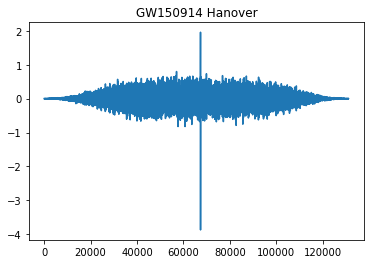

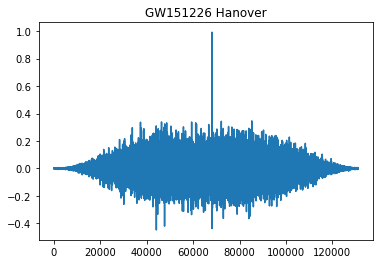

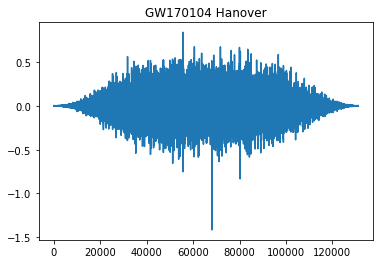

In [92]:
for i in range(len(fn_H1)):
    plt.title(eventnames[i] + ' Hanover')
    plt.plot(np.fft.fftshift(mf_data(fn_H1[i],fn_template[i])))
    plt.show()

### MF Livingston Data

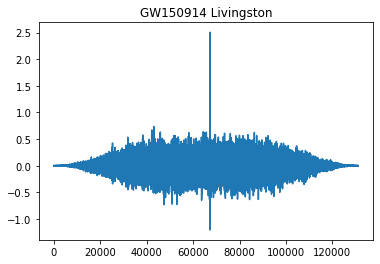

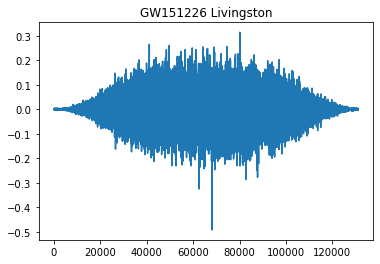

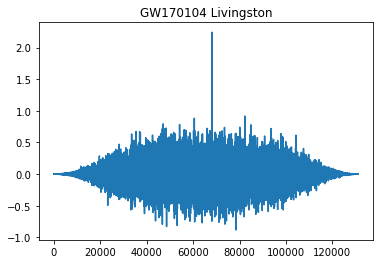

In [108]:
for i in range(len(fn_L1)):
    plt.title(eventnames[i] + ' Livingston')
    plt.plot(np.fft.fftshift(mf_data(fn_L1[i],fn_template[i])))
    plt.show()

# c) Estimate a noise for each event, and from the output of the matched filter, give a signal-to-noise ratio for each event, both from the individual detectors, and from the combined Livingston + Hanford events.

For estimated SNR, I take the noise to be the scatter (standard deviation) of the MF data far from the signal (which either appears as a large positive or negative spike in the middle of the MF, since we FFT shifted).

I take my noise between 5000 and 1000 Hz, since this is sufficiently far away from the signal that we're sure not to get any signal, but not so far that it is affected by the window (note that plots above are fftshifted).

In [109]:
snr_l = np.array(())
snr_h = np.array(())
snr_tot = np.array(())

for i in range(len(fn_L1)):
    #fft shift our MF data to match above plots
    mf_l = mf_data(fn_L1[i],fn_template[i])
    mf_h = mf_data(fn_H1[i],fn_template[i])
    
    #estimate noise as scatter far from the signal
    noise_l = np.std(mf_l[5000:10000])
    noise_h = np.std(mf_h[5000:10000])
    
    snr_l = np.append(snr_l,np.max(np.abs(mf_l/noise_l)))
    snr_h = np.append(snr_h,np.max(np.abs(mf_h/noise_h)))

    snr_tot = np.append(snr_tot,np.sqrt(snr_l[i]**2 + snr_h[i]**2))

data = {'Events':eventnames,'Livingston SNR':snr_l,'Hanford SNR':snr_h,'Combined SNR':snr_tot}
df = pd.DataFrame(data)
df

,Events,Livingston SNR,Hanford SNR,Combined SNR
0,GW150914,13.776898,18.496087,23.063134
1,GW151226,6.604502,10.143953,12.104513
2,GW170104,9.283428,7.853006,12.159430


# d) Compare the signal-to-noise you get from the scatter in the matched filter to the analytic signal-to-noise you expect from your noise model. How close are they? If they disagree, can you explain why?

From Jon's notes, analytic noise is  $(A^T N^{-1} A)^{-1/2}$, where A is the template and $N^{-1}$ is `Ninv` from our `get_noise_model` function from part a).

We get our "signal" from the matched filter output, so our analytic SNR is $\frac{MF}{(A^T N^{-1} A)^{-1/2}}$. This is the "ideal SNR" as per Jon's matched filter notes.

When we compare the below table with the cell above, we can see that for GW150914 and GW170104 the analytic SNR is an OOM higher than the estimated SNR from scatter. Though it's better for GW151226, the SNR is still over double what we got from scatter. I didn't whiten my filter because Jon said in lecture that this shouldn't impact MF results, so I assume this wouldn't affect the scatter. I think what is happening here is that the MF noise isn't white, so taking the standard deviation as our noise estimate.

In [241]:
snr_l_ana = np.array(())
snr_h_ana = np.array(())
snr_tot_ana = np.array(())

for i in range(len(fn_L1)):
    #fft shift our MF data to match above plots
    mf_l = np.fft.fftshift(mf_data(fn_L1[i],fn_template[i]))
    mf_h = np.fft.fftshift(mf_data(fn_H1[i],fn_template[i]))
    
    temp,tx = read_template(fn_template[i])
    strain_l,dt_l,utc_l = read_file(fn_L1[i])
    strain_h,dt_h,utc_h = read_file(fn_H1[i])
        
    #analytic noise
    noise_l = (temp.T*get_noise_model(strain_l,resize=False)*temp)**(-0.5)
    noise_h = (temp.T*get_noise_model(strain_h,resize=False)*temp)**(-0.5)
            
    snr_l_ana = np.append(snr_l_ana,np.max(np.abs(mf_l/noise_l)))
    snr_h_ana = np.append(snr_h_ana,np.max(np.abs(mf_h/noise_h)))

    snr_tot_ana = np.append(snr_tot_ana,np.sqrt(snr_l_ana[i]**2 + snr_h_ana[i]**2))

data = {'Events':eventnames,'Livingston SNR':snr_l_ana,'Hanford SNR':snr_h_ana,'Combined SNR':snr_tot_ana}
df = pd.DataFrame(data)
df

/var/folders/dg/7jl6bkpj645c5wgdkkh7h8zw0000gn/T/ipykernel_9667/426371160.py:15: RuntimeWarning: divide by zero encountered in power
  noise_l = (temp.T*get_noise_model(strain_l,resize=False)*temp)**(-0.5)
/var/folders/dg/7jl6bkpj645c5wgdkkh7h8zw0000gn/T/ipykernel_9667/426371160.py:16: RuntimeWarning: divide by zero encountered in power
  noise_h = (temp.T*get_noise_model(strain_h,resize=False)*temp)**(-0.5)


,Events,Livingston SNR,Hanford SNR,Combined SNR
0,GW150914,154.052234,148.727143,214.130460
1,GW151226,21.059588,15.550098,26.178461
2,GW170104,230.297089,99.768123,250.978938


# e) Find the frequency from each event where half the weight comes from above that frequency and half from below

Weights are computed with $\frac{FFT\ template}{N}$ in Fourier space, where N is the noise matrix ($1/N_{inv}$) To figure out the weights at each frequency, we'll take the cumulative sum and normalize by dividing by the total sum. The frequency we're looking for is where this value > 0.5. We can find the index of this and get the `nu_vec` value at that index.

The frequencies at which this happens are ~130 Hz (see exact numbers below). This correlates with the region where we see our detector noise plot above "bottom out".

Note that I needed to use a different `get_noise_model` function just to use the rfft instead of fft - weights behave weird when there are imaginary numbers.

GW150914


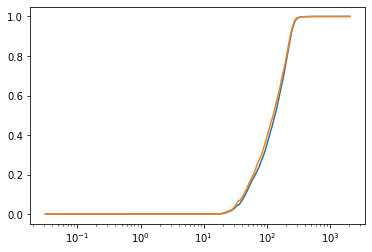

Hanover Frequency: 125.0625 Hz
Livingston Frequency: 134.25 Hz
GW151226


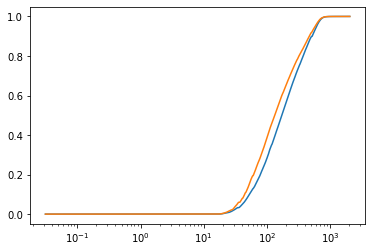

Hanover Frequency: 132.9375 Hz
Livingston Frequency: 171.78125 Hz
GW170104


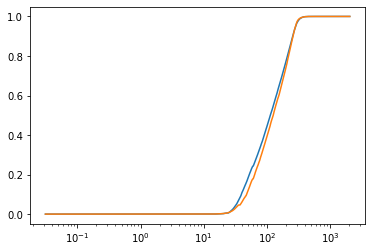

Hanover Frequency: 125.84375 Hz
Livingston Frequency: 113.125 Hz


In [164]:
def get_noise_model2(strain,resize=True):
    win = window(0.8,len(strain)) #window with a Turkey window with alpha = 0.8
    ft_windowed = np.fft.rfft(strain*win) #window our strain data
    ps = np.abs(ft_windowed)**2 #take the ps of windowed data
    smooth = smooth_vector(ps,5) #smooth with a gaussian of width 10
    if resize:
        smooth = smooth[:len(ft_windowed)//2+1]
    Ninv = 1/smooth
    return Ninv

for i in range(len(fn_template)):
    
    print(eventnames[i])
        
    strain_h,dt_h,utc_h = read_file(fn_H1[i])
    strain_l,dt_l,utc_l = read_file(fn_L1[i])

    template,tx = read_template(fn_template[i])
    template_fft = np.fft.rfft(template*window(0.8,len(template)))
    
    nu_arr = np.fft.rfftfreq(len(strain_l),dt_l)
    
    power_vec_l = np.sqrt(get_noise_model2(strain_l,resize=False))
    power_vec_h = np.sqrt(get_noise_model2(strain_h,resize=False))
    
    weights_l = np.abs(template_fft[1:]*power_vec_l)
    weights_h = np.abs(template_fft[1:]*power_vec_h)
    
    sum_weights_l = np.sum(weights_l)
    sum_weights_h = np.sum(weights_h)
    
    cumsum_l = np.cumsum(weights_l)
    cumsum_h = np.cumsum(weights_h)

    plt.plot(nu_arr[1:],cumsum_l/sum_weights_l)
    plt.plot(nu_arr[1:],cumsum_h/sum_weights_h)
    plt.xscale('log')
    plt.show()
    freq_h = nu_arr[np.argwhere(cumsum_h/sum_weights_h > 0.5)[0][0]]
    freq_l = nu_arr[np.argwhere(cumsum_l/sum_weights_l > 0.5)[0][0]]

    print(f"Hanover Frequency: {freq_h} Hz")
    print(f"Livingston Frequency: {freq_l} Hz")
    print("=========================================================")

# f) Localize time of arrival. What is the typical uncertainty for detectors a few thousand km apart?

Let's plot the MF output with the proper time axis (it was already in regular space, since the MF iffts back). Then we'll find the time where the amplitude is at its peak (max amplitude). 

We'll just do this for the first GW event, since the uncertainty should be the same for the others. I take the FWHM/2.355 (https://en.wikipedia.org/wiki/Full_width_at_half_maximum) as the uncertainty on the time localization.

Given that the detectors are located O(1000) km apart and GW travel at the speed of light, the uncertainty in position comes from the difference in arrival times $8.5 \times 10^{-8} s$:

$\Delta p = \frac{c \Delta t}{B}$, where p is position and B is the baseline (use 1000 km).

$\Rightarrow \Delta p = 0.0000255\ radians$

GW150914
TOA at Livingston = 2015-09-14T09:50:30.433 +/- 0.0008293524416135881 s
TOA at Hanford = 2015-09-14T09:50:30.440 +/- 0.0018660429936305733 s
Difference in arrival times: 8.477105034598864e-08 s


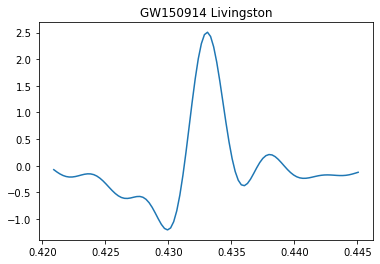

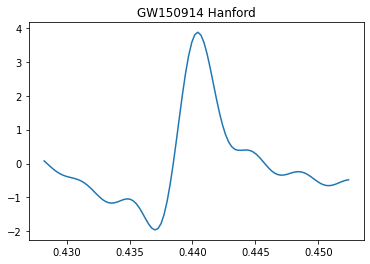

GW151226
TOA at Livingston = 2015-12-26T03:38:38.646 +/- 0.0007256833864118897 s
TOA at Hanford = 2015-12-26T03:38:38.648 +/- 0.0047687765392781314 s
Difference in arrival times: 1.4128508363242531e-08 s


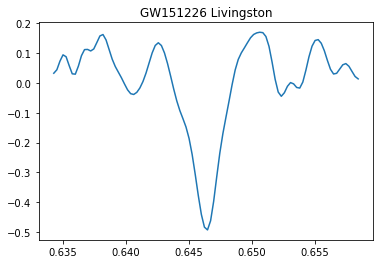

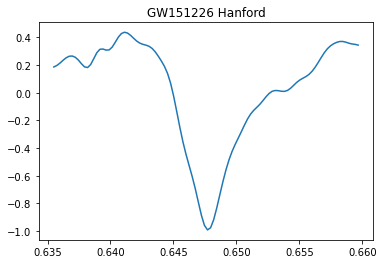

GW170104
TOA at Livingston = 2017-01-04T10:11:44.611 +/- 0.0010366905520169851 s
TOA at Hanford = 2017-01-04T10:11:44.608 +/- 0.000622014331210191 s
Difference in arrival times: 3.673412179994173e-08 s


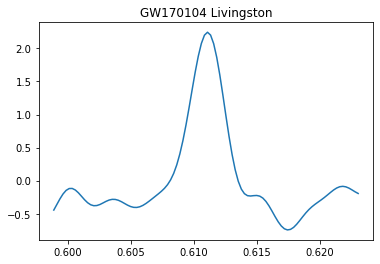

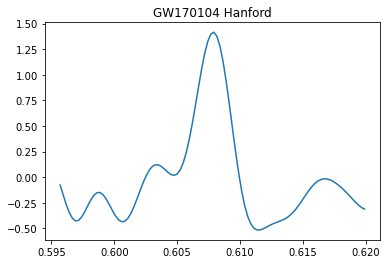

In [171]:
from astropy.time import Time, TimeDelta

for i in range(len(eventnames)):
    print(f'{eventnames[i]}')
    l_strain,l_dt,l_utc=read_file(fn_L1[i])
    h_strain,h_dt,h_utc=read_file(fn_H1[i])
    #time_vec = np.arange(0,len(l_strain))*l_dt

    mf_l = mf_data(fn_L1[i],fn_template[i])
    mf_h = mf_data(fn_H1[i],fn_template[i])

    amp_l = np.max(np.abs(mf_l))
    amp_h = np.max(np.abs(mf_l))

    idx_l = np.argmax(np.abs(mf_l))
    idx_h = np.argmax(np.abs(mf_h))

    time_vec=np.arange(len(mf_l))*l_dt
    toa_l = time_vec[idx_l]
    toa_h = time_vec[idx_h]

    #print(Time(l_utc))

    idx_err_l = np.argwhere(amp_l/2<np.abs(mf_l[idx_l-30:idx_l+30]))
    idx_err_h = np.argwhere(amp_h/2<np.abs(mf_h[idx_l-30:idx_l+30]))

    err_l=((idx_err_l[-1]-idx_err_l[0])*dt_l)/2.355
    err_h=((idx_err_h[-1]-idx_err_h[0])*dt_h)/2.355

    print(f"TOA at Livingston = {Time(l_utc)+ TimeDelta(time_vec[idx_l],format='sec')} +/- {err_l[0]} s")
    print(f"TOA at Hanford = {Time(h_utc)+ TimeDelta(time_vec[idx_h],format='sec')} +/- {err_h[0]} s")

    time_diff = np.abs(Time(l_utc)+ TimeDelta(time_vec[idx_l],format='sec')-(Time(h_utc)+ TimeDelta(time_vec[idx_h],format='sec')))

    print(f'Difference in arrival times: {time_diff} s')

    plt.plot(time_vec[idx_l-50:idx_l+50],mf_l[idx_l-50:idx_l+50])
    plt.title(f'{eventnames[i]} Livingston')
    plt.show()
    plt.plot(time_vec[idx_h-50:idx_h+50],-mf_h[idx_h-50:idx_h+50])
    plt.title(f'{eventnames[i]} Hanford')
    plt.show()
    
    print('==================================================================')